In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
from sklearn.datasets import load_boston
bos=load_boston()

In [38]:
bos.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [39]:
DF=pd.DataFrame(bos.data)

In [40]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
DF.columns=bos.feature_names

In [42]:
DF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
DF['Price']=bos.target

In [44]:
DF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
df=DF.copy()

In [46]:
x=df.drop('Price',axis=1)
y=df['Price']

In [47]:
x.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [48]:
#linear regression model:
#ols model:
import statsmodels.api as sm
xconst=sm.add_constant(x)
m=sm.OLS(y,xconst).fit()
pred=m.predict(xconst)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          6.72e-135
Time:                        13:49:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#constructing the residual plot:
sns.set(style='whitegrid')
df['pred']=m.predict(xconst)#fitted/predicted values
res=m.resid #residuals


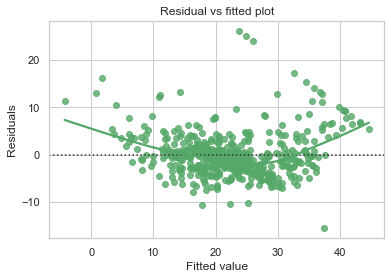

In [50]:
ax=sns.residplot(df.pred,res,lowess=True,color='g')
ax.set(xlabel='Fitted value',ylabel='Residuals',title='Residual vs fitted plot')
plt.show()

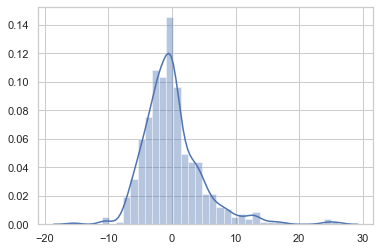

In [51]:
sns.distplot(res)

squareroot transformation:

In [52]:
df1=DF.copy()

In [53]:
df2=df1.transform(lambda x:x**0.5)
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.079498,4.242641,1.519868,0.0,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591,4.898979
1,0.165257,0.000000,2.658947,0.0,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243,4.647580
2,0.165197,0.000000,2.658947,0.0,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486,5.890671
3,0.179917,0.000000,1.476482,0.0,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643,5.779273
4,0.262774,0.000000,1.476482,0.0,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679,6.016644


In [54]:
x=df2.drop('Price',axis=1)
y=df2['Price']

In [55]:
#linear regression model:
#ols model:
import statsmodels.api as sm
xconst=sm.add_constant(x)
m=sm.OLS(y,xconst).fit()
pred=m.predict(xconst)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     150.5
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          5.21e-162
Time:                        13:49:42   Log-Likelihood:                -278.08
No. Observations:                 506   AIC:                             584.2
Df Residuals:                     492   BIC:                             643.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1299      0.908     11.161      0.000       8.347      11.913
CRIM          -0.1512      0.027     -5.638      0.000      -0.204      -0.098
ZN             0.0153      0.010      1.489      0.137      -0.005       0.035
INDUS         -0.0161      0.035     -0.456      0.648      -0.085       0.053
CHAS           0.2378      0.077      3.070      0.002       0.086       0.390
NOX           -2.8083      0.558     -5.033      0.000      -3.905      -1.712
RM             1.0707      0.191      5.594      0.000       0.695       1.447
AGE            0.0116      0.016      0.711      0.478      -0.021       0.044
DIS           -0.6481      0.081     -8.044      0.000      -0.806      -0.490
RAD            0.2430      0.037      6.532      0.000       0.170       0.316
TAX           -0.0447      0.012     -3.785      0.000      -0.068      -0.022
PTRATIO       -0.7331      0.099     -7.408      0.000      -0.928      -0.539
B              0.0212      0.006      3.488      0.001       0.009       0.033
LSTAT         -0.5275      0.035    -15.286      0.000      -0.595      -0.460
==============================================================================
Omnibus:                       81.549   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.809
Skew:                           0.807   Prob(JB):                     1.67e-46
Kurtosis:                       5.719   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# the r^2 value shows a slight increase after the transformations.

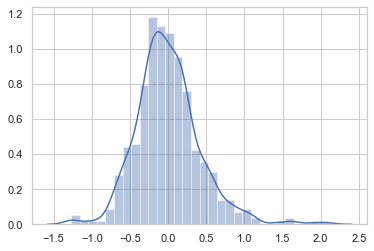

In [58]:
sns.set(style='whitegrid')
res=m.resid
sns.distplot(res)

In [59]:
#log transformations:
df3=DF.copy()
df4=df3.transform(lambda x:np.log(x))
df4.head()

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,2.890372,0.837248,-inf,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,-inf,1.955860,-inf,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,-inf,1.955860,-inf,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,-inf,0.779325,-inf,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,-inf,0.779325,-inf,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


In [60]:
#inverse transformations:
df5=DF.transform(lambda x:1/x)
df5.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,158.227848,0.055556,0.432900,inf,1.858736,0.152091,0.015337,0.244499,1.000000,0.003378,0.065359,0.002520,0.200803,0.041667
1,36.616624,inf,0.141443,inf,2.132196,0.155739,0.012674,0.201325,0.500000,0.004132,0.056180,0.002520,0.109409,0.046296
2,36.643459,inf,0.141443,inf,2.132196,0.139179,0.016367,0.201325,0.500000,0.004132,0.056180,0.002546,0.248139,0.028818
3,30.892802,inf,0.458716,inf,2.183406,0.142898,0.021834,0.164957,0.333333,0.004505,0.053476,0.002534,0.340136,0.029940
4,14.482259,inf,0.458716,inf,2.183406,0.139919,0.018450,0.164957,0.333333,0.004505,0.053476,0.002520,0.187617,0.027624


In [62]:
#exponential transformations:
df6=DF.transform(lambda x:np.exp(x))
df6.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,1.006340,6.565997e+07,10.074425,1.0,1.712578,716.945624,2.070142e+28,59.739892,2.718282,3.557678e+128,4.412712e+06,2.352230e+172,145.474382,2.648912e+10
1,1.027686,1.000000e+00,1176.148034,1.0,1.598395,614.617424,1.844313e+34,143.609814,7.389056,1.256796e+105,5.375784e+07,2.352230e+172,9320.765132,2.403039e+09
2,1.027666,1.000000e+00,1176.148034,1.0,1.598395,1319.489238,3.430780e+26,143.609814,7.389056,1.256796e+105,5.375784e+07,4.016995e+170,56.260911,1.174948e+15
3,1.032900,1.000000e+00,8.846306,1.0,1.580909,1094.442084,7.774765e+19,429.318900,20.085537,2.590449e+96,1.322229e+08,2.430141e+171,18.915846,3.202106e+14
4,1.071490,1.000000e+00,8.846306,1.0,1.580909,1270.289365,3.457490e+23,429.318900,20.085537,2.590449e+96,1.322229e+08,2.352230e+172,206.437974,5.265750e+15


In [65]:
#square transformations:
df7=DF.transform(lambda x:x**2)
df7.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.000040,324.0,5.3361,0.0,0.289444,43.230625,4251.04,16.728100,1.0,87616.0,234.09,157529.6100,24.8004,576.00
1,0.000746,0.0,49.9849,0.0,0.219961,41.229241,6225.21,24.672082,4.0,58564.0,316.84,157529.6100,83.5396,466.56
2,0.000745,0.0,49.9849,0.0,0.219961,51.624225,3733.21,24.672082,4.0,58564.0,316.84,154315.4089,16.2409,1204.09
3,0.001048,0.0,4.7524,0.0,0.209764,48.972004,2097.64,36.750269,9.0,49284.0,349.69,155732.8369,8.6436,1115.56
4,0.004768,0.0,4.7524,0.0,0.209764,51.079609,2937.64,36.750269,9.0,49284.0,349.69,157529.6100,28.4089,1310.44
